### MIMICS-CN, global results
- reads in MIMICS results from Melannie's test simulations
- /project/tss/bgc01/melannie/git_CASACLM/biogeochem_testbed_1.1/GRID_CN/MIMICS/OUTPUT_CN/SPIN
- compares to C-only version
- /project/tss/wwieder/CASACLM/GRID/OUTPUT_GRID_CRU_NCEP/CASACNP_post_ADSPIN_c &

- plots zonal distributions of fluxes

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
#import cartopy 
#import utils
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

# some resources for plotting
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.lines as mlines
%matplotlib inline

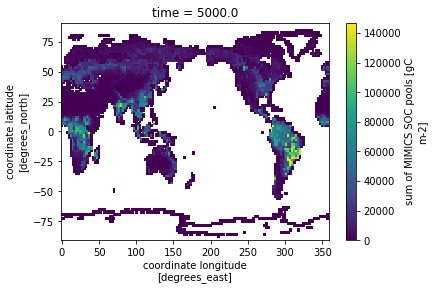

In [4]:
dIN = '/project/tss/bgc01/melannie/git_CASACLM/biogeochem_testbed_1.1/GRID_CN/MIMICS/OUTPUT_CN/SPIN/mimics_pool_flux_5000.nc'
dINmimVeg = '/project/tss/bgc01/melannie/git_CASACLM/biogeochem_testbed_1.1/GRID_CN/MIMICS/OUTPUT_CN/SPIN/casaclm_pool_flux_5000.nc'
ds  = xr.open_mfdataset(dINmim, decode_times=True)
dsMIMveg  = xr.open_mfdataset(dINmimVeg, decode_times=True)

#combine relevent data from casa history files to MIMICS data
ds['cnpp'] = dsMIMveg['cnpp']
ds['cgpp'] = dsMIMveg['cgpp']

# sum soil C & N pools
ds = utils.sum_pools(ds, 'mim')
ds['cTOT'].plot();

### All soil C is in the tropics
### total C:N is very low

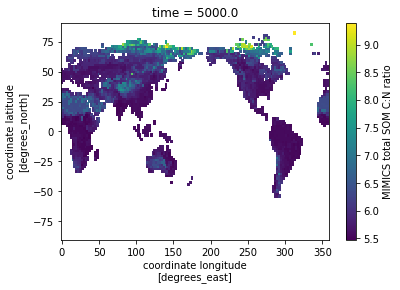

In [5]:
ds['cnTOT'].plot();


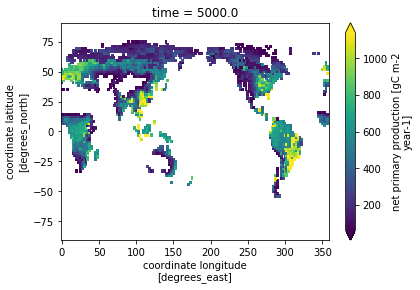

In [6]:
ds['cnpp'].where(ds.cnpp>50).plot(robust=True);

## Define function for printing global sum

In [13]:
def globalSum ( varIn, area=ds.landarea *1e6, time=1, conversion=1e-15, units=None ):
    "Global weighted sum of fluxes & states"
    temp = varIn * area 
    temp = temp.sum(dim=('lat','lon')) * conversion
    print(varIn.attrs['long_name']+' '+str(np.round(temp.values,1))+' Pg C')

In [14]:
globalSum(ds['cgpp'])
globalSum(ds['cnpp'])
globalSum(ds['cTOT'])

gross primary production [118.6] Pg C
net primary production [43.1] Pg C
sum of MIMICS SOC pools [2690.4] Pg C


In [15]:
ConlyIN = '/project/tss/wwieder/CASACLM/GRID/OUTPUT_GRID_CRU_NCEP/MIMICS_SPIN_b/'
Ccas = ConlyIN+'casaclm_pool_flux_9000_9980.nc'
Cmim = ConlyIN+'mimics_pool_flux_9000_9980.nc'

In [18]:
dsC     = xr.open_mfdataset(Cmim, decode_times=True)
dsCveg  = xr.open_mfdataset(Ccas, decode_times=True)
dsC['cnpp'] = dsCveg['cnpp']
dsC['cgpp'] = dsCveg['cgpp']
dsC = utils.sum_pools(dsC, 'mim', 'False')

In [17]:
globalSum(dsC['cgpp'].isel(time=0))
globalSum(dsC['cnpp'].isel(time=0))
globalSum(dsC['cTOT'].isel(time=0))

gross primary production 118.6 Pg C
net primary production 48.9 Pg C
sum of MIMICS SOC pools 1470.2 Pg C


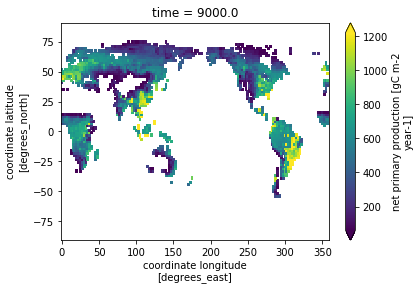

In [19]:
dsC['cnpp'].where(dsC['cnpp']>50).isel(time=0).plot(robust=True);

### difference in NPP (CN-C)
- most notably in boreal forests.
- somewhat int tropcs

NPP difference (CN-C) [-5.9] Pg C


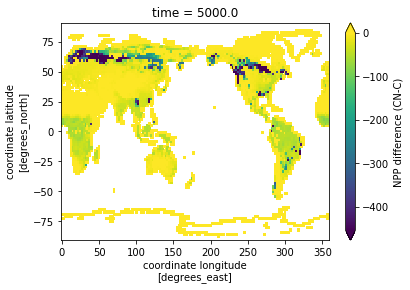

In [20]:
dNPP = ds['cnpp'] - dsC['cnpp'].isel(time=0)
dNPP.attrs['long_name'] = 'NPP difference (CN-C)'
globalSum(dNPP)
dNPP.plot(robust=True);

total SOC difference (CN-C) [1220.2] Pg C


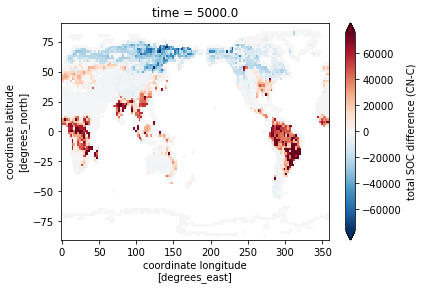

In [21]:
dSOC = ds['cTOT'] - dsC['cTOT'].isel(time=0)
dSOC.attrs['long_name'] = 'total SOC difference (CN-C)'
globalSum(dSOC)
dSOC.plot(robust=True);

In [22]:
var  =  ['cHresp','cnpp', 'cgpp']
varLong  =  ['Rh_mim','npp', 'gpp']

# sum up fluxes
ann_flux = ds * ds.landarea *1e6
for i in range(len(var)):
    ann_flux.get(var[i]).attrs['units'] = 'gC y-1'

nan


<xarray.Dataset>
Dimensions:          (lat: 96, time: 1)
Coordinates:
  * lat              (lat) float32 -90.0 -88.10526 -86.210526 ... 88.10526 90.0
  * time             (time) float32 5000.0
Data variables:
    IGBP_PFT         (lat) float64 dask.array<shape=(96,), chunksize=(96,)>
    landarea         (lat) float32 dask.array<shape=(96,), chunksize=(96,)>
    cellMissing      (lat) float64 dask.array<shape=(96,), chunksize=(96,)>
    cellid           (lat) float64 dask.array<shape=(96,), chunksize=(96,)>
    cLITm            (time, lat) float32 dask.array<shape=(1, 96), chunksize=(1, 96)>
    cLITs            (time, lat) float32 dask.array<shape=(1, 96), chunksize=(1, 96)>
    cMICr            (time, lat) float32 dask.array<shape=(1, 96), chunksize=(1, 96)>
    cMICk            (time, lat) float32 dask.array<shape=(1, 96), chunksize=(1, 96)>
    cSOMa            (time, lat) float32 dask.array<shape=(1, 96), chunksize=(1, 96)>
    cSOMc            (time, lat) float32 dask.array<shape

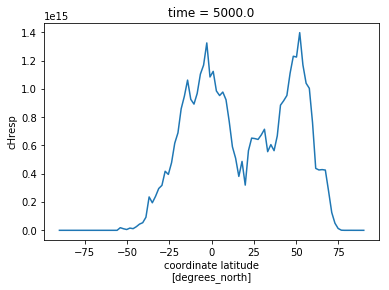

In [25]:
print(ann_flux.get(var[0]).values.sum()*1e-15) #convert gC to PgC
zon_sum = ann_flux.sum(dim='lon')
zon_sum.cHresp.plot();
zon_sum

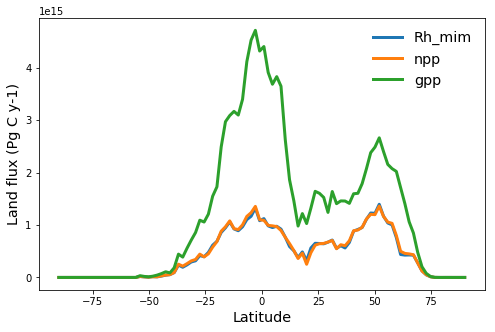

In [26]:
plt.figure(figsize=[8,5])
#plt.ylabel('Change Global Land C ('+g585y.units+')', fontsize='x-large')
for i in range(len(var)):
    plt.plot(zon_sum.lat, zon_sum.get(var[i]).isel(time=0), lw=3)

plt.legend(labels=(varLong), frameon = False, fontsize='x-large')
plt.ylabel('Land flux (Pg C y-1)', fontsize='x-large')
plt.xlabel('Latitude', fontsize='x-large');